In [20]:
import numpy as np
import matplotlib.pyplot as pl
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns
import itertools
from wordcloud import WordCloud,STOPWORDS
import io
import base64
from matplotlib import rc,animation
from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import warnings
warnings.filterwarnings("ignore")

In [9]:
survey=pd.read_csv('/Users/rissu/survey_results_public.csv')

In [10]:
survey.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


In [11]:
survey.shape

(98855, 129)

In [16]:
missing=survey.isnull().sum().reset_index()
missing[0]=missing[0]*100/missing[0].sum()

In [18]:
missing.head()

,index,0
0,Respondent,0.000000
1,Hobby,0.000000
2,OpenSource,0.000000
3,Country,0.009473
4,Student,0.090911


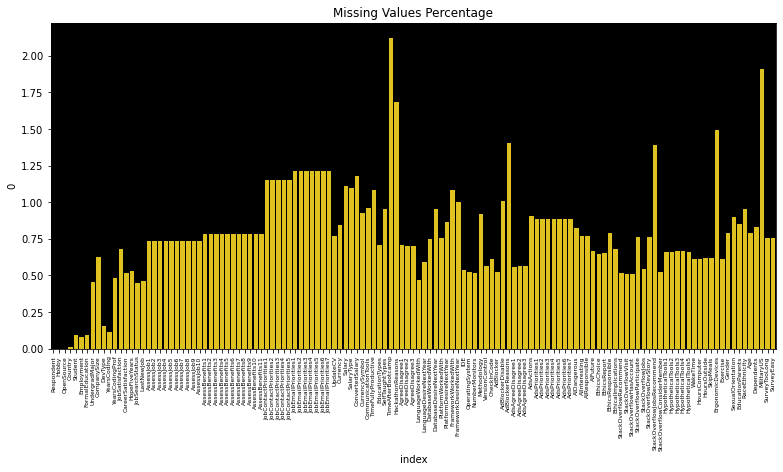

In [26]:
pl.figure(figsize=(13,6))
ax=sns.barplot('index',0,data=missing,color='gold')
pl.xticks(rotation=90,fontsize=6)
ax.set_facecolor('black')
pl.title("Missing Values Percentage")
pl.show()

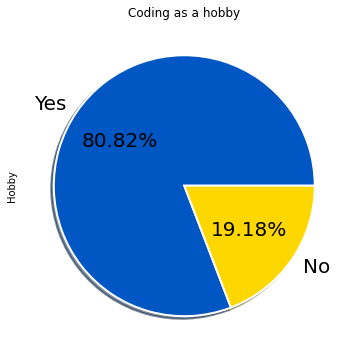

In [46]:
survey['Hobby'].value_counts().plot.pie(figsize=(6,6),autopct='%1.2f%%',
                                       colors=sns.color_palette('prism',3),
                                       shadow=True,
                                        fontsize=20,
                                        wedgeprops={'linewidth':2,
                                                   'edgecolor':'white'}
                                )
pl.title("Coding as a hobby")
pl.show()

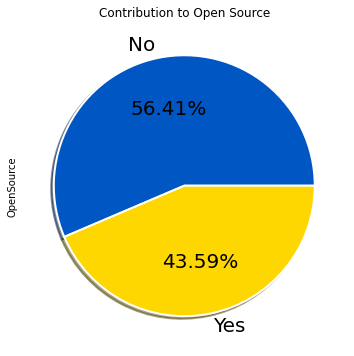

In [44]:
survey['OpenSource'].value_counts().plot.pie(figsize=(6,6),autopct='%1.2f%%',
                                       colors=sns.color_palette('prism',3),
                                       shadow=True,
                                        fontsize=20,
                                        wedgeprops={'linewidth':2,
                                                   'edgecolor':'white'}
                                )
pl.title("Contribution to Open Source")
pl.show()